### Import necessary tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, auc

### Dummy data

In [2]:
NUM_CLASSES = 919

TARGET = np.random.randint(0, 2, (128, 919))
PRED = np.random.uniform(0, 1, (128, 919))

# Compute PR curve and PR area for each class

In [5]:
precision = {}
recall = {}
pr_auc = {}
for i in range(NUM_CLASSES):
    precision[i], recall[i], _ = precision_recall_curve(TARGET[:, i], PRED[:, i])
    pr_auc[i] = auc(precision[i], recall[i])

ValueError: x is neither increasing nor decreasing : [0.53968254 0.536      0.54032258 0.53658537 0.53278689 0.53719008
 0.54166667 0.54621849 0.55084746 0.54700855 0.55172414 0.55652174
 0.55263158 0.55752212 0.5625     0.55855856 0.56363636 0.55963303
 0.56481481 0.56074766 0.56603774 0.57142857 0.56730769 0.5631068
 0.56862745 0.56435644 0.56       0.55555556 0.55102041 0.55670103
 0.55208333 0.54736842 0.55319149 0.55913978 0.55434783 0.54945055
 0.55555556 0.5505618  0.54545455 0.54022989 0.53488372 0.52941176
 0.53571429 0.53012048 0.53658537 0.5308642  0.525      0.53164557
 0.53846154 0.54545455 0.53947368 0.53333333 0.52702703 0.52054795
 0.52777778 0.52112676 0.51428571 0.52173913 0.51470588 0.50746269
 0.5        0.49230769 0.484375   0.47619048 0.46774194 0.47540984
 0.46666667 0.45762712 0.44827586 0.43859649 0.42857143 0.41818182
 0.42592593 0.41509434 0.42307692 0.43137255 0.44       0.44897959
 0.45833333 0.44680851 0.45652174 0.46666667 0.47727273 0.46511628
 0.45238095 0.46341463 0.45       0.43589744 0.42105263 0.43243243
 0.41666667 0.42857143 0.41176471 0.39393939 0.40625    0.41935484
 0.43333333 0.44827586 0.42857143 0.44444444 0.46153846 0.44
 0.41666667 0.39130435 0.40909091 0.42857143 0.4        0.42105263
 0.44444444 0.41176471 0.4375     0.46666667 0.5        0.53846154
 0.5        0.45454545 0.4        0.33333333 0.375      0.42857143
 0.5        0.4        0.5        0.66666667 0.5        1.
 1.        ].

# Compute micro-average ROC curve and ROC area

In [4]:
fpr['micro'], tpr['micro'], _ = roc_curve(TARGET.ravel(), PRED.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

# Plot ROC curves

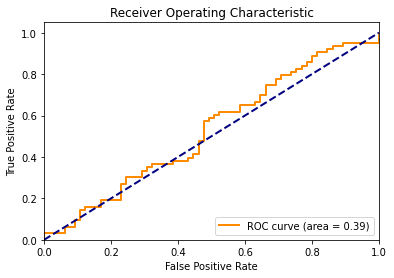

In [5]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [6]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_CLASSES):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= NUM_CLASSES

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot micro and macro ROC curves

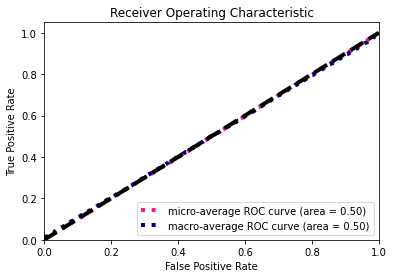

In [7]:
plt.figure()
lw = 4
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', lw=lw)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()